In [1]:
from os import path
import numpy as np

file_path = ['W0_Client5']
snr_list = [{f'{path}': np.load(f'{path}/all_snr_list.npy')} for path in file_path]

In [2]:
print(snr_list)

[{'W0_Client5': array([26.616161, 22.35264 , 27.745676, 24.41394 , 26.556387, 24.686249,
       24.823097, 27.213545, 26.380707, 26.051498, 24.61028 , 24.688673,
       26.363338, 27.179928, 27.465363, 27.342813, 27.517277, 24.847754,
       24.727278, 27.376175, 24.744665, 26.962456, 26.018696, 27.464783,
       23.649296, 24.636833, 25.341736, 27.610266, 26.420902, 27.289   ,
       23.069468, 24.805334, 23.543013, 27.728395, 24.192007, 23.971693,
       24.797035, 27.442438, 27.656494, 25.392216, 26.306402, 25.447102,
       24.588993, 26.265848, 23.93958 , 22.8632  , 23.208303, 22.78796 ,
       24.734558, 26.387272, 26.633648, 26.541834, 23.457338, 24.478426,
       26.31891 , 24.844015, 27.254257, 26.503504, 27.613794, 24.741   ,
       25.068533, 25.84977 , 23.958265, 26.08019 , 26.699528, 26.313011,
       27.458303, 26.915443, 24.661333, 27.367542, 25.989447, 24.453266],
      dtype=float32)}]


In [20]:
def compare_plot(data, ind=0, ant=0):
    import matplotlib.pyplot as plt
    snr = data['snr_b'][ind]
    uplink = np.sqrt(data['cond'][ind, :, :, ant, 0]**2 + data['cond'][ind, :, :, ant, 1]**2)
    downlink_gt = np.sqrt(data['data'][ind, :, :, ant, 0]**2 + data['data'][ind, :, :, ant, 1]**2)
    downlink_pred = np.sqrt(data['pred'][ind, :, :, ant, 0]**2 + data['pred'][ind, :, :, ant, 1]**2)
    vmin = min(np.min(uplink), np.min(downlink_gt), np.min(downlink_pred))
    vmax = max(np.max(uplink), np.max(downlink_gt), np.max(downlink_pred))
    plt.subplot(3, 1, 1)
    plt.imshow(uplink, aspect='auto', vmin=vmin, vmax=vmax)
    plt.title('Uplink')
    plt.subplot(3, 1, 2)
    plt.imshow(downlink_gt, aspect='auto', vmin=vmin, vmax=vmax)
    plt.title('Downlink Ground Truth')
    plt.subplot(3, 1, 3)
    plt.imshow(downlink_pred, aspect='auto', vmin=vmin, vmax=vmax)
    plt.title('Downlink Estimation')
    plt.gcf().supxlabel('Subcarrier Index')
    plt.gcf().supylabel('Time Frame')
    plt.tight_layout()
    plt.savefig('/mnt/data/WQ/LoRAT/Estimation_display.pdf', bbox_inches='tight', dpi=300)
    plt.show()
    print(f'SNR: {snr}, Antenna: {ant}, Index: {ind}')

['snr_b', 'data', 'pred', 'cond']
(16, 14, 26, 96, 2)


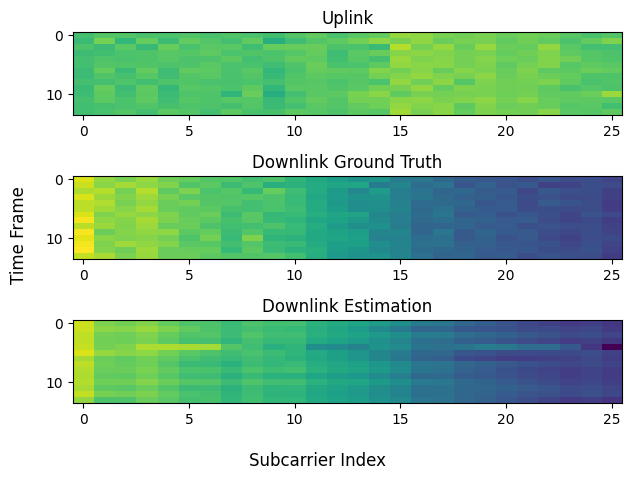

SNR: 26.616161346435547, Antenna: 0, Index: 0


In [21]:
data0 = np.load(f'{file_path[0]}/data_0.npz', allow_pickle=True)
print(data0.files)
print(data0['data'].shape)
compare_plot(data0, ind=0, ant=0)
import matplotlib.pyplot as plt
